In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
def get_dim(Im):
    """Takes an image as an input and gives dimensions for pixels (width and height)"""
    return Image.open(Im).size
def get_xy(Im):
    """Take an image and return all possible (x,y) coordinate combinations"""
    width, height = Image.open(Im).size
    return list(product(np.arange(width),np.arange(height)))
def get_rgb(Im):
    """Take an image and return rgb values for every pixel"""
    im = Image.open(Im) 
    pix = im.load()
    rgb = [pix[i,j] for i,j in get_xy(Im)]
    return rgb
def get_data(Im):
    """Take an image and extract all the coordinates and RGB values of each pixel. Returns a data frame 
    containing that information"""
    img_data = list(zip(get_xy(Im),get_rgb(Im)))
    df = []
    for i in img_data:
        columns = {'x':i[0][0],'y':i[0][1],'R':i[1][0],'G':i[1][1],'B':i[1][2]}
        df.append(columns)
    return pd.DataFrame(df)

In [38]:
df = get_data('BLUE.jpeg')
df

,x,y,R,G,B
0,0,0,86,140,200
1,0,1,86,140,200
2,0,2,86,140,200
3,0,3,86,140,200
4,0,4,86,140,200
...,...,...,...,...,...
562495,749,745,86,140,200
562496,749,746,86,140,200
562497,749,747,86,140,200
562498,749,748,86,140,200


In [40]:
center = sorted(list(range(4,256,8))*8)
center

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 84,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 108,
 108,
 108,
 108,
 108,
 108,
 108,
 108,
 116,
 116,
 116,
 116,
 116,
 116,
 116,
 116,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 140,
 148,
 148,
 148,
 148,
 148,
 148,
 148,
 148,
 156,
 156,
 156,
 156,
 156,
 156,
 156,
 156,
 164,
 164,
 164,
 164,
 164,
 164,
 164,
 164,
 172,
 172,
 172,
 172,
 172,
 172,
 172,
 172,
 180,
 180,
 180,
 180,
 180,
 180,
 180,
 180,


In [41]:
list(zip(range(0,256),center))

[(0, 4),
 (1, 4),
 (2, 4),
 (3, 4),
 (4, 4),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 12),
 (9, 12),
 (10, 12),
 (11, 12),
 (12, 12),
 (13, 12),
 (14, 12),
 (15, 12),
 (16, 20),
 (17, 20),
 (18, 20),
 (19, 20),
 (20, 20),
 (21, 20),
 (22, 20),
 (23, 20),
 (24, 28),
 (25, 28),
 (26, 28),
 (27, 28),
 (28, 28),
 (29, 28),
 (30, 28),
 (31, 28),
 (32, 36),
 (33, 36),
 (34, 36),
 (35, 36),
 (36, 36),
 (37, 36),
 (38, 36),
 (39, 36),
 (40, 44),
 (41, 44),
 (42, 44),
 (43, 44),
 (44, 44),
 (45, 44),
 (46, 44),
 (47, 44),
 (48, 52),
 (49, 52),
 (50, 52),
 (51, 52),
 (52, 52),
 (53, 52),
 (54, 52),
 (55, 52),
 (56, 60),
 (57, 60),
 (58, 60),
 (59, 60),
 (60, 60),
 (61, 60),
 (62, 60),
 (63, 60),
 (64, 68),
 (65, 68),
 (66, 68),
 (67, 68),
 (68, 68),
 (69, 68),
 (70, 68),
 (71, 68),
 (72, 76),
 (73, 76),
 (74, 76),
 (75, 76),
 (76, 76),
 (77, 76),
 (78, 76),
 (79, 76),
 (80, 84),
 (81, 84),
 (82, 84),
 (83, 84),
 (84, 84),
 (85, 84),
 (86, 84),
 (87, 84),
 (88, 92),
 (89, 92),
 (90, 92),
 (91, 92),
 (92, 

In [42]:
for i,j in zip(range(0,256),center):
    df['R'] = df['R'].replace(i,j)
    df['G'] = df['G'].replace(i,j)
    df['B'] = df['B'].replace(i,j)

In [43]:
df

,x,y,R,G,B
0,0,0,84,140,204
1,0,1,84,140,204
2,0,2,84,140,204
3,0,3,84,140,204
4,0,4,84,140,204
...,...,...,...,...,...
562495,749,745,84,140,204
562496,749,746,84,140,204
562497,749,747,84,140,204
562498,749,748,84,140,204


In [44]:
df.to_numpy()

array([[  0,   0,  84, 140, 204],
       [  0,   1,  84, 140, 204],
       [  0,   2,  84, 140, 204],
       ...,
       [749, 747,  84, 140, 204],
       [749, 748,  84, 140, 204],
       [749, 749,  84, 140, 204]])

In [45]:
df = [tuple(i) for i in df.to_numpy()]

In [46]:
df

[(0, 0, 84, 140, 204),
 (0, 1, 84, 140, 204),
 (0, 2, 84, 140, 204),
 (0, 3, 84, 140, 204),
 (0, 4, 84, 140, 204),
 (0, 5, 84, 140, 204),
 (0, 6, 84, 140, 204),
 (0, 7, 84, 140, 204),
 (0, 8, 84, 140, 204),
 (0, 9, 84, 140, 204),
 (0, 10, 84, 140, 204),
 (0, 11, 84, 140, 204),
 (0, 12, 84, 140, 204),
 (0, 13, 84, 140, 204),
 (0, 14, 84, 140, 204),
 (0, 15, 84, 140, 204),
 (0, 16, 84, 140, 204),
 (0, 17, 84, 140, 204),
 (0, 18, 84, 140, 204),
 (0, 19, 84, 140, 204),
 (0, 20, 84, 140, 204),
 (0, 21, 84, 140, 204),
 (0, 22, 84, 140, 204),
 (0, 23, 84, 140, 204),
 (0, 24, 84, 140, 204),
 (0, 25, 84, 140, 204),
 (0, 26, 84, 140, 204),
 (0, 27, 84, 140, 204),
 (0, 28, 84, 140, 204),
 (0, 29, 84, 140, 204),
 (0, 30, 84, 140, 204),
 (0, 31, 84, 140, 204),
 (0, 32, 84, 140, 204),
 (0, 33, 84, 140, 204),
 (0, 34, 84, 140, 204),
 (0, 35, 84, 140, 204),
 (0, 36, 84, 140, 204),
 (0, 37, 84, 140, 204),
 (0, 38, 84, 140, 204),
 (0, 39, 84, 140, 204),
 (0, 40, 84, 140, 204),
 (0, 41, 84, 140, 204),
 (

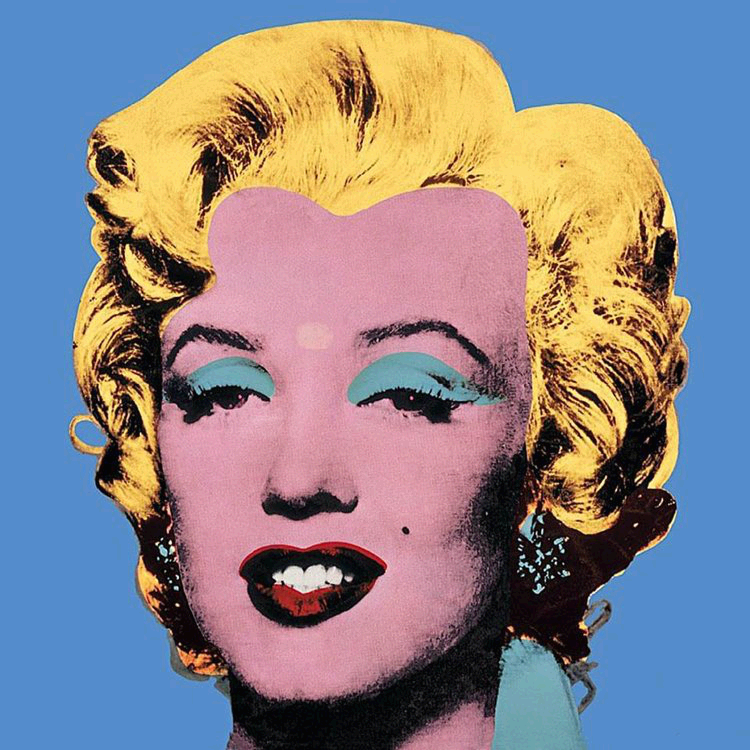

In [47]:
im = Image.open('BLUE.jpeg') 
pix = im.load()
for x,y,R,G,B in df:
    pix[x,y] = (R,G,B)
im

In [48]:
im.save('BlueS.png')

In [162]:
df = get_data('BlueS.png')

In [163]:
df = df.iloc[:,2:].drop_duplicates()

In [164]:
df

,R,G,B
0,84,140,204
36375,84,140,196
45320,92,140,204
47618,84,140,188
48144,92,140,196
...,...,...,...
513385,172,180,212
515698,68,156,188
516348,132,172,212
516351,148,180,212


In [165]:
clst = AgglomerativeClustering(n_clusters = 16, linkage = 'average')
clsts = clst.fit(np.asarray(df))
df['Cluster'] = clsts.labels_

In [166]:
df

,R,G,B,Cluster
0,84,140,204,15
36375,84,140,196,15
45320,92,140,204,15
47618,84,140,188,15
48144,92,140,196,15
...,...,...,...,...
513385,172,180,212,8
515698,68,156,188,15
516348,132,172,212,8
516351,148,180,212,8


In [167]:
dists = linkage(np.asarray(df),method = 'average')

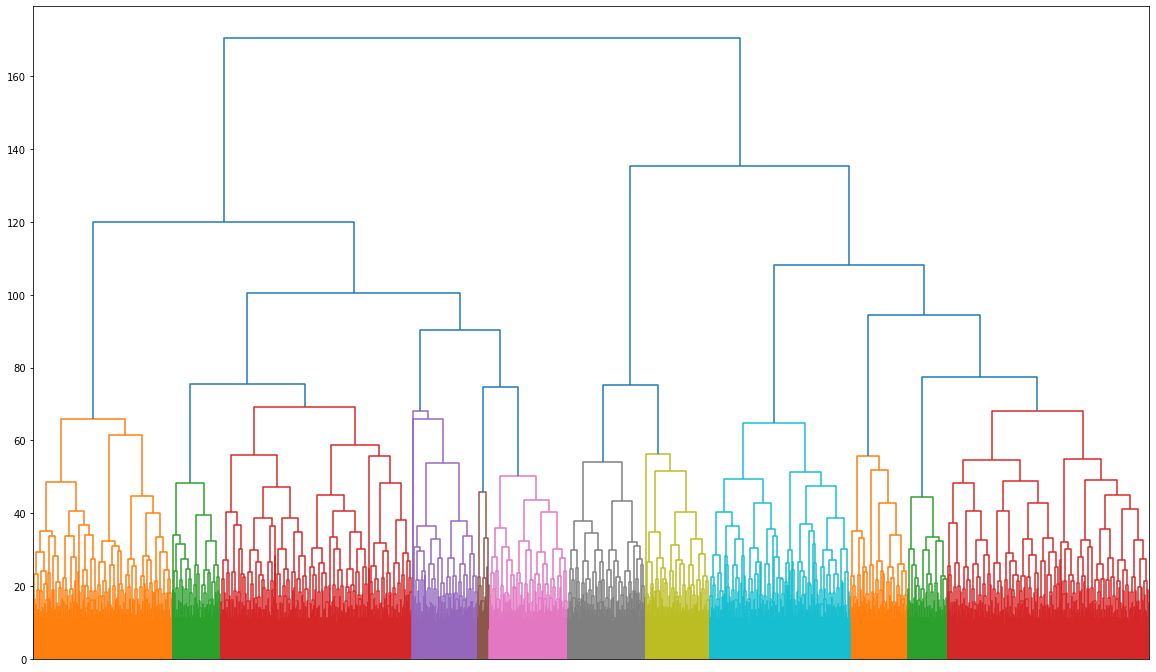

In [168]:
plt.figure(figsize = (20,12))
dendrogram(dists, no_labels = True, color_threshold = 70)
plt.show()

In [169]:
dfo = get_data('BlueS.png')
dfo

,x,y,R,G,B
0,0,0,84,140,204
1,0,1,84,140,204
2,0,2,84,140,204
3,0,3,84,140,204
4,0,4,84,140,204
...,...,...,...,...,...
562495,749,745,84,140,204
562496,749,746,84,140,204
562497,749,747,84,140,204
562498,749,748,84,140,204


In [170]:
df = dfo.merge(df,on = ['R','G','B'],how = 'inner')

In [171]:
df

,x,y,R,G,B,Cluster
0,0,0,84,140,204,15
1,0,1,84,140,204,15
2,0,2,84,140,204,15
3,0,3,84,140,204,15
4,0,4,84,140,204,15
...,...,...,...,...,...,...
562495,687,449,68,156,188,15
562496,687,450,68,156,188,15
562497,688,348,132,172,212,8
562498,688,351,148,180,212,8


In [172]:
df['Cluster'].value_counts()

15    192830
1      76622
5      76240
4      61846
12     57027
0      29111
7      16652
9      13280
10     11771
11     10139
8       6237
3       4676
13      2591
6       1763
2       1624
14        91
Name: Cluster, dtype: int64

In [67]:
def inspect(Im,cluster,background = (255,255,255)):
    """View all the pixels in a specific cluster derived from HC"""
    ind = df.loc[df['Cluster'] != cluster,['x','y']]
    im = Image.open(Im)
    pix = im.load()
    for i,j in zip(list(ind['x']),list(ind['y'])):
        pix[i,j] = background
    return im    

In [69]:
bluem = Image.open('Blues.png')

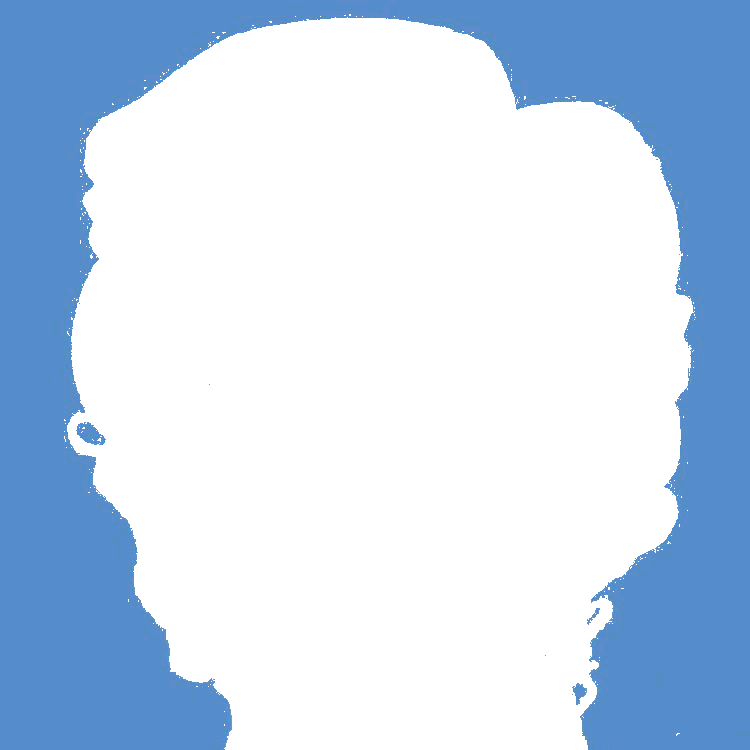

In [188]:
inspect('BlueS.png',15)